In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def f(x,y):
    """
    Функция f(x,y)= x**2 + 2*y**2 + e^(x + y)
    :param x: Значение x(float).
    :param y: Значение y(float).
    :return: Результат (float).
    """
    
    return x**2 + 2*y**2 + np.exp(x + y)

In [3]:
def grad_f(x,y): 
    """
    Градиент функциии f(x,y), определенной выше.
    :param x: Значение x(float).
    :param y: Значение y(float).
    :return: Градиент функции (np.array[2], где первый элемент - градиент по x, второй градиент по y)  
    """
    grad_x = 2*x + np.exp(x + y)
    grad_y = 4*y + np.exp(x + y)
    return np.array([grad_x, grad_y])

In [4]:
def grad_descent_2d(f, grad_f, lr, num_iter=100, x0=None, y0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: функция двух переменных f 
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :param x0: Начальное значение x(float).
        :param y0: Начальное значение y(float).
        :return: Матрица размерности (num_iter, 3), где каждая строка содержит (x,y,f(x,y)).
    """
    if x0 is None:
        x0 = 1
    if y0 is None:
        y0 = 1

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла -- шаг градиентнго спуска
    curr_x,curr_y = x0,y0
    for iter_num in range(num_iter):
        entry = np.array([curr_x, curr_y, f(curr_x, curr_y)])
        history.append(entry)
        gradient=grad_f(curr_x,curr_y)
        curr_x -= lr *gradient[0]
        curr_y -= lr *gradient[1]
        

    return np.vstack(history)

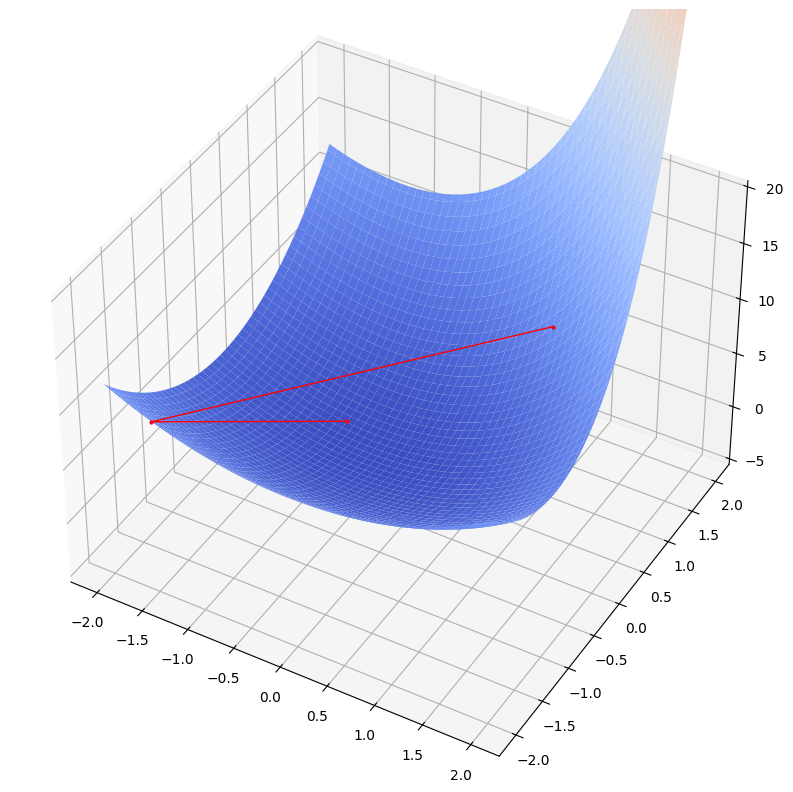

In [5]:
lr=0.265
num_iter=3
steps = grad_descent_2d(f, grad_f, lr=lr, num_iter=num_iter)

X, Y = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
Z = f(X, Y)

# Создание 3D графика
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, zorder=2)
ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='o', markersize=2, zorder=3,
        markerfacecolor='m', lw=1, c='red')

ax.set_zlim(-5, 20)
ax.view_init(elev=40)

# Отображение графика и графика значений функции на каждом шаге
plt.show()

In [6]:
def g(x,y):
    """
    Функция f(x,y)= 3*x**2 - 3*x*y + 4*y**2 - 2*x + y
    :param x: Значение x(float).
    :param y: Значение y(float).
    :return: Результат (float).
    """
    
    return 3*x**2 - 3*x*y + 4*y**2 - 2*x + y

In [7]:
def grad_g(x,y): 
    """
    Градиент функциии f(x,y), определенной выше.
    :param x: Значение x(float).
    :param y: Значение y(float).
    :return: Градиент функции (np.array[2], где первый элемент - градиент по x, второй градиент по y)  
    """
    grad_x = 6*x - 3*y - 2
    grad_y = -3*x + 8*y + 1
    return np.array([grad_x, grad_y])

In [8]:
def grad_descent_3d(g, grad_g, lr, num_iter=100, x0=None, y0=None):
    """
    функция, которая реализует градиентный спуск в минимум для функции f от двух переменных. 
        :param f: функция двух переменных f 
        :param grad_f: градиент функции f (вектор размерности 2)
        :param lr: learning rate алгоритма
        :param num_iter: количество итераций градиентного спуска
        :param x0: Начальное значение x(float).
        :param y0: Начальное значение y(float).
        :return: Матрица размерности (num_iter, 3), где каждая строка содержит (x,y,f(x,y)).
    """
    if x0 is None:
        x0 = 1
    if y0 is None:
        y0 = 1

    # будем сохранять значения аргументов и значений функции 
    # в процессе град. спуска в переменную history
    history = []

    # итерация цикла -- шаг градиентнго спуска
    curr_x,curr_y = x0,y0
    for iter_num in range(num_iter):
        entry = np.array([curr_x, curr_y, g(curr_x, curr_y)])
        history.append(entry)
        gradient=grad_g(curr_x,curr_y)
        curr_x -= lr *gradient[0]
        curr_y -= lr *gradient[1]
        

    return np.vstack(history)

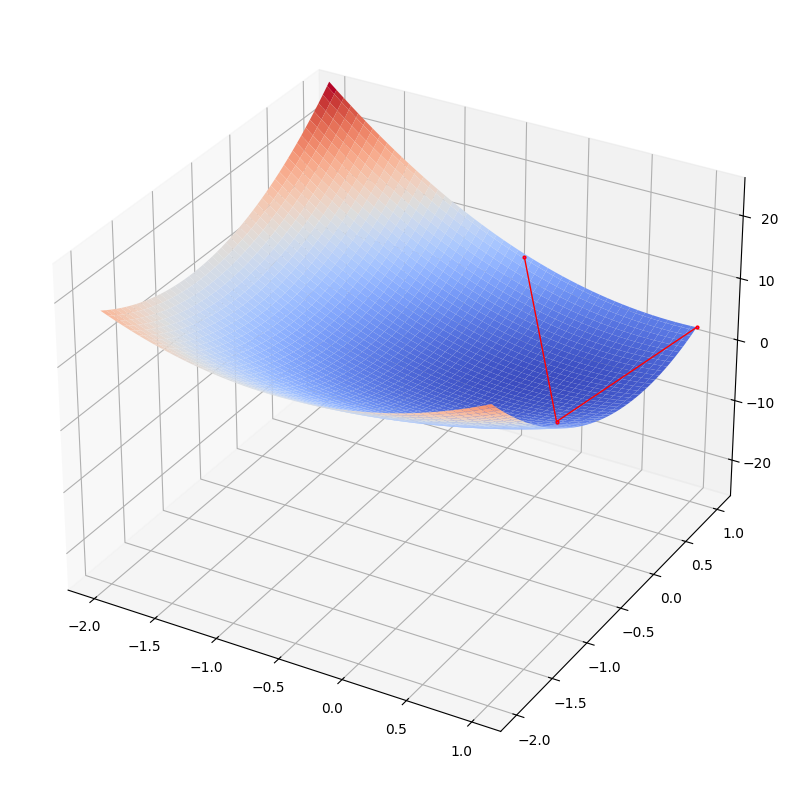

In [9]:
lr=0.265
num_iter=3
steps = grad_descent_3d(g, grad_g, lr=lr, num_iter=num_iter)

X, Y = np.meshgrid(np.linspace(-2, 1, 200), np.linspace(-2, 1, 100))
Z = g(X, Y)

# Создание 3D графика
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, zorder=2)
ax.plot(xs=steps[:, 0], ys=steps[:, 1], zs=steps[:, 2],
        marker='o', markersize=2, zorder=3,
        markerfacecolor='m', lw=1, c='red')

ax.set_zlim(-25, 25)
ax.view_init(elev=30)

# Отображение графика и графика значений функции на каждом шаге
plt.show()